In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Un premier regard sur un réseau de neurones

- Premier exemple concret de réseau de neurones, qui utilise le package Python Keras pour apprendre à classer chiffres écrits à la main. 


- Le problème que nous essayons de résoudre ici est de classer les images en niveaux de gris de chiffres manuscrits (28 pixels sur 28 pixels) dans leur 10 catégories (0 à 9). 


- Le jeu de données que nous allons utiliser est le MNIST, un jeu de données classique de la communauté d’apprentissage automatique, qui a été presque aussi longtemps que le champ lui-même et a été très intensément étudié. C'est un ensemble de 60 000 images d'apprentissage, plus 10 000 de tests

In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Etudions les données d'apprentissage :

6


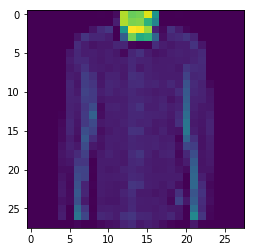

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[33])
print(train_labels[33])

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Notre flux de travail sera le suivant: d’abord, nous présenterons à notre réseau de neurones les données d’entraînement, `train_images` et` train_labels`.


Le réseau apprendra ensuite à associer des images et des étiquettes. Enfin, nous demanderons au réseau de produire des prédictions pour `test_images`, et nous vérifierons si ces prédictions correspondent aux étiquettes de `test_labels`.

In [12]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


Ici, notre réseau consiste en une séquence de deux couches `Dense`, qui sont des couches densément connectées.


La deuxième (et dernière) couche est une couche "softmax", ce qui signifie qu’elle renverra un tableau de 10 scores de probabilité


Nous devons choisir trois éléments supplémentaires dans le cadre de l’étape "compilation":

- Une fonction de perte: voici comment le réseau sera capable de mesurer la qualité de son travail sur ses données de formation, et donc comment il le sera capable de se diriger dans la bonne direction.
-  Un optimiseur: c'est le mécanisme par lequel le réseau se mettra à jour en fonction des données qu'il voit et de sa fonction de perte.
- Mesures : pendant la formation et les tests. Ici, nous ne nous intéresserons qu'à la précision (la fraction des images qui ont été correctement classifié).

In [13]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Avant l'apprentissage, nous allons prétraiter nos données en les transformant dans la forme attendue par le réseau et en les redimensionnant de manière à ce que toutes les valeurs soient en mémoire.


Nos images étaient stockées dans un tableau de formes `(60000, 28, 28)` de type `uint8` avec des valeurs dans l'intervalle `[0, 255]`. Nous le transformons en un `tableau float32` de forme` (60000, 28 * 28) `avec des valeurs comprises entre 0 et 1.

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


Nous devons également coder les étiquettes de manière catégorielle : 

Nous sommes maintenant prêts à apprendre notre réseau via un appel à la méthode `fit` du réseau :

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128,validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2758 - acc: 0.8991 - val_loss: 0.3355 - val_acc: 0.8814
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2615 - acc: 0.9038 - val_loss: 0.3909 - val_acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2512 - acc: 0.9068 - val_loss: 0.3580 - val_acc: 0.8811
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2409 - acc: 0.9102 - val_loss: 0.3873 - val_acc: 0.8707
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2334 - acc: 0.9129 - val_loss: 0.3435 - val_acc: 0.8917


Deux quantités sont affichées pendant l’apprentissage : la "perte" du réseau sur les données d’apprentissage et la précision du réseau sur les données d'entraînement.

Nous atteignons rapidement une précision de 0,989 (soit 98,9%) sur les données d’apprentissage. Vérifions maintenant que notre modèle fonctionne bien sur le jeu de tests:

In [7]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/step


In [8]:
print('test_acc:', test_acc)

test_acc: 0.8663
